In [1]:
import pandas as pd
import sklearn 

In [2]:
df = pd.read_csv('Roman Urdu DataSet.csv')

In [3]:
df.head()

,Comment,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [5]:
df.shape[0]

20229

In [4]:
df["Comment"]

0        Sai kha ya her kisi kay bus ki bat nhi hai lak...
1                                                sahi bt h
2                                              Kya bt hai,
3                                               Wah je wah
4                                     Are wha kaya bat hai
                               ...                        
20224             Hamari jese awam teli laga k mazay leti 
20225    Kaash hum b parhay likhay hotayKabhi likhtay g...
20226    Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...
20227                       aanti toh gussa e kr gai hain 
20228    mai b sirf shadi kanry ki waja say imran khan ...
Name: Comment, Length: 20229, dtype: object

In [5]:
df["Sentiment"] 

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20224    Negative
20225    Negative
20226    Negative
20227    Negative
20228    Positive
Name: Sentiment, Length: 20229, dtype: object

In [6]:
import nltk
import string
import re
import os
import gensim
from gensim.models import Word2Vec

In [7]:
if os.path.exists('word2vec.bin'):
    word2vec_model = Word2Vec.load('word2vec.bin')
    print("existing model loaded")
else:
    comment_list = []
    pattern = re.compile("^[a-zA-Z]+$")
    for idx, comments in df.iterrows():
        words = nltk.word_tokenize(str(comments['Comment']))
        for word in words:
            if not pattern.match(word):
                words.remove(word)
        comment_list.append(words)
    print("comments tokenized, start to train Word2Vec model")
    word2vec_model = Word2Vec(sentences=comment_list, min_count=1, workers=8)
    print("training completed")
    word2vec_model.save('word2vec.bin')
    print("model saved")
    

existing model loaded


In [8]:
word2vec_model.wv.vectors.shape

(38838, 100)

In [9]:
len(word2vec_model.wv.vocab)

38838

# Visualize Word2Vec in 2D plot

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import mpld3
import numpy as np

%matplotlib inline


/home/ximingfeng/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


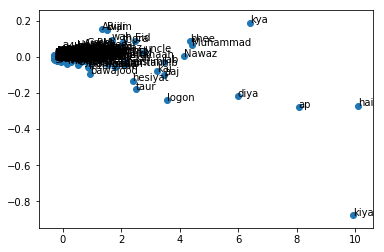

In [11]:
words = word2vec_model.wv.vocab
X = word2vec_model[word2vec_model.wv.vocab]
pca = PCA(n_components=2)
X_reduced_2D = pca.fit_transform(X)
mpld3.enable_notebook()
import numpy as np
rand_idx = np.random.choice(38838, 1000)
plt.scatter(X_reduced_2D[rand_idx, 0], X_reduced_2D[rand_idx, 1])
for i, word in enumerate(words):
    if i in rand_idx:
        plt.annotate(word, xy=(X_reduced_2D[i, 0], X_reduced_2D[i, 1]))

In [12]:
print(words['like'])
print(words['love'])
print(words['hate'])
print(words['no'])
print(words['yes'])

Vocab(count:51, index:628, sample_int:4294967296)
Vocab(count:60, index:529, sample_int:4294967296)
Vocab(count:10, index:3269, sample_int:4294967296)
Vocab(count:80, index:390, sample_int:4294967296)
Vocab(count:11, index:2878, sample_int:4294967296)


In [13]:
word2vec_model.wv.most_similar_cosmul(positive=['like'], negative=['hate', 'dislike'], topn=10)

[('😑😑😠', 11.628728866577148),
 ('khisak', 11.454020500183105),
 ('shining', 11.165072441101074),
 ('jolly', 11.101271629333496),
 ('dungi', 11.1007080078125),
 ('meaR', 11.089788436889648),
 ('shaeef', 11.085275650024414),
 ('pehnn', 11.076741218566895),
 ('otaak', 11.02375316619873),
 ('kaih', 11.011226654052734)]

In [14]:
word2vec_model.wv.get_vector('like').shape

(100,)

In [15]:
def get_output_idx(sentiment):
    result = 0
    if sentiment == "Positive":
        result = 1
    elif sentiment == "Neutral":
        result = 2
    return result

In [28]:
df = pd.read_csv('Roman Urdu DataSet.csv')
comment_list = []
pattern = re.compile("^[a-zA-Z]+$")
y = []
for idx, comments in df.iterrows():
    words = nltk.word_tokenize(str(comments['Comment']))
    cleaned_words = np.array([word2vec_model.wv.get_vector(word) for word in words if pattern.match(word)])
    comment_list.append(cleaned_words)
    y.append(get_output_idx(str(comments['Comment'])))

In [29]:
X = np.array(comment_list)
y = np.array(y)

In [30]:
X.shape

(20229,)

In [31]:
print(X[1].shape)


(3, 100)


In [25]:
df.head()

,Comment,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [32]:
print(y.shape)

(20229,)


# Store the sentences in the form of array of word vector

In [26]:
import pickle

In [33]:
with open('data.pkl', 'wb') as output_file:
    pickle.dump([X, y], output_file)
    

In [35]:
with open('data.pkl', 'rb') as data_file:
    prepro_data = pickle.load(data_file)
    print(type(prepro_data[0]))
    print(type(prepro_data[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
